In [59]:
import pymongo
import datetime
from matplotlib import pyplot
import numpy
databasePW = "areallybadpassword"

In [60]:
client = pymongo.MongoClient("mongodb://admin:" + databasePW + "@blinky-mongo-01:27017/blinky-lite?retryWrites=true&serverSelectionTimeoutMS=5000&connectTimeoutMS=10000&authSource=admin&authMechanism=SCRAM-SHA-256")

In [61]:
trayType='blinky-mqtt'
trayName = 'maxi-01'
cubeName = 'watchdog'

In [62]:
queryFilter = {"$and" : [{"type": trayType},{"name": trayName}] }
#print('Complete record:')
#print(client["blinky-lite"].archiver.find_one(queryFilter,{'_id':0}))

In [63]:
timezone = 0
#
startYear = 2023
startMonth = 10
startDay = 17
startHour = 0
startMinute = 0
startSecond = 0
#
stopYear = 2023
stopMonth = 10
stopDay = 17
stopHour = 10
stopMinute = 0
stopSecond = 0

In [64]:
startTimestamp = ((datetime.datetime(startYear,startMonth,startDay,startHour,startMinute,startSecond) - datetime.datetime(1970, 1, 1)).total_seconds() - timezone * 3600) * 1000
stopTimestamp = ((datetime.datetime(stopYear,stopMonth,stopDay,stopHour,stopMinute,stopSecond) - datetime.datetime(1970, 1, 1)).total_seconds() - timezone * 3600) * 1000

queryFilter = {"$and" : [{"type": trayType},{"name": trayName},{"timeStamp" : {"$gte": startTimestamp, "$lte": stopTimestamp} } ] }
projectionFilter =  {'_id':0, 'timeStamp': 1, cubeName: 1}
archiveRecord = client["blinky-lite"].archiver.find(queryFilter,projectionFilter)

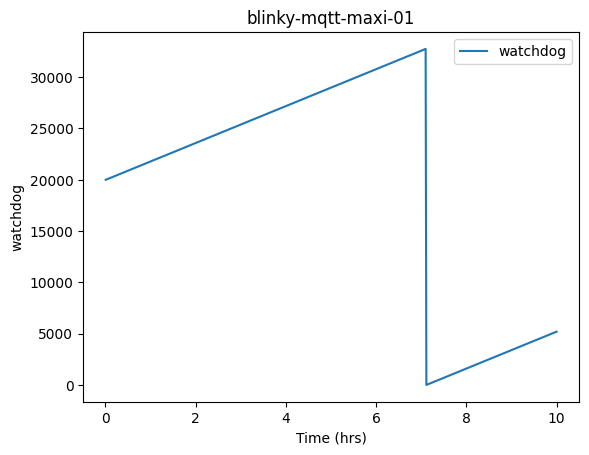

In [65]:
data = []
for x in archiveRecord:
  data.append([(x['timeStamp'] - startTimestamp) / 3600000,x[cubeName]])
data = sorted(data,key=lambda l:l[0])
data = numpy.array(data)
pyplot.plot(data[:,0], data[:,1], label = cubeName)
pyplot.ylabel(cubeName)
pyplot.xlabel('Time (hrs)')
pyplot.title(trayType + '-' + trayName)
pyplot.legend()
pyplot.show()